
# Predicting Concrete Strength
## Assignment 2: 

 

### Outline
1. Importing Libraries
2. Loading data
3. Exploratory analysis
4. Modelling
    - Changing number of nodes in hidden layers
    - Changing activation function to Softmax in last layer
    - Changing number of hidden layers
    - Implementing Linear Regression for comparison with deep learning models
5. Conclusion

Note: The models shown in this presetation are not based on their best performances on LeaderBoard. These are prepared to follow the instructions to complete the required criteria for the compulsory assignment for part 1.

### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # style for matplotlib plots

import warnings
warnings.filterwarnings('ignore') # to ignore package related warnings or future amendments in package

In [49]:
# sklearn modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# keras
from keras.layers import Dense
from keras.models import Model, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [3]:
!ls # files in folder

concrete_strength.ipynb data


### Loading data

In [4]:
data = pd.read_csv('data/Concrete_train.csv')
test = pd.read_csv('data/Concrete_test.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 9 columns):
Cement                         721 non-null float64
BlastFurnaceSlag               721 non-null float64
FlyAsh                         721 non-null float64
Water                          721 non-null float64
Superplasticizer               721 non-null float64
CoarseAggregate                721 non-null float64
FineAggregate                  721 non-null float64
Age                            721 non-null int64
ConcreteCompressiveStrength    721 non-null float64
dtypes: float64(8), int64(1)
memory usage: 50.8 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
Cement              309 non-null float64
BlastFurnaceSlag    309 non-null float64
FlyAsh              309 non-null float64
Water               309 non-null float64
Superplasticizer    309 non-null float64
CoarseAggregate     309 non-null float64
FineAggregate       309 non-null float64
Age                 309 non-null int64
dtypes: float64(7), int64(1)
memory usage: 19.4 KB


It is quite evident that there are no null values in the dataset

In [7]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,525.000000,0.000000,0.000000,189.000000,0.0,1125.000000,613.000000,7,42.419998
1,276.000000,116.000000,90.000000,180.000000,9.0,870.000000,768.000000,28,44.279999
2,182.000000,45.200001,122.000000,170.199997,8.2,1059.400024,780.700012,100,48.669998
3,212.600006,0.000000,100.400002,159.399994,10.4,1003.799988,903.799988,100,47.740002
4,251.399994,0.000000,118.300003,188.500000,6.4,1028.400024,757.700012,100,44.209999


#### Exploratory analysis
Density plot shows us the distribution of values in the data.

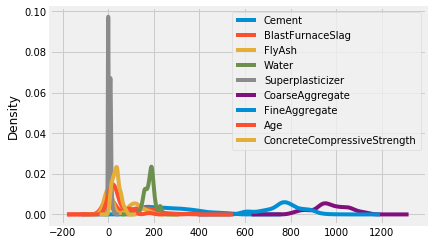

In [8]:
data.plot(kind='density')
plt.show()

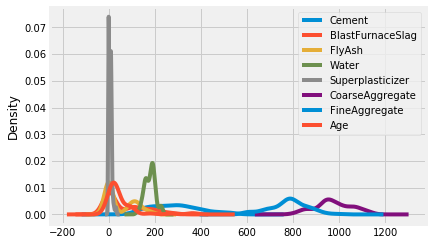

In [9]:
test.plot(kind='density')
plt.show()

To better understand the distribution of values of one variable as a relationship with other variable, we sketched pairplots.

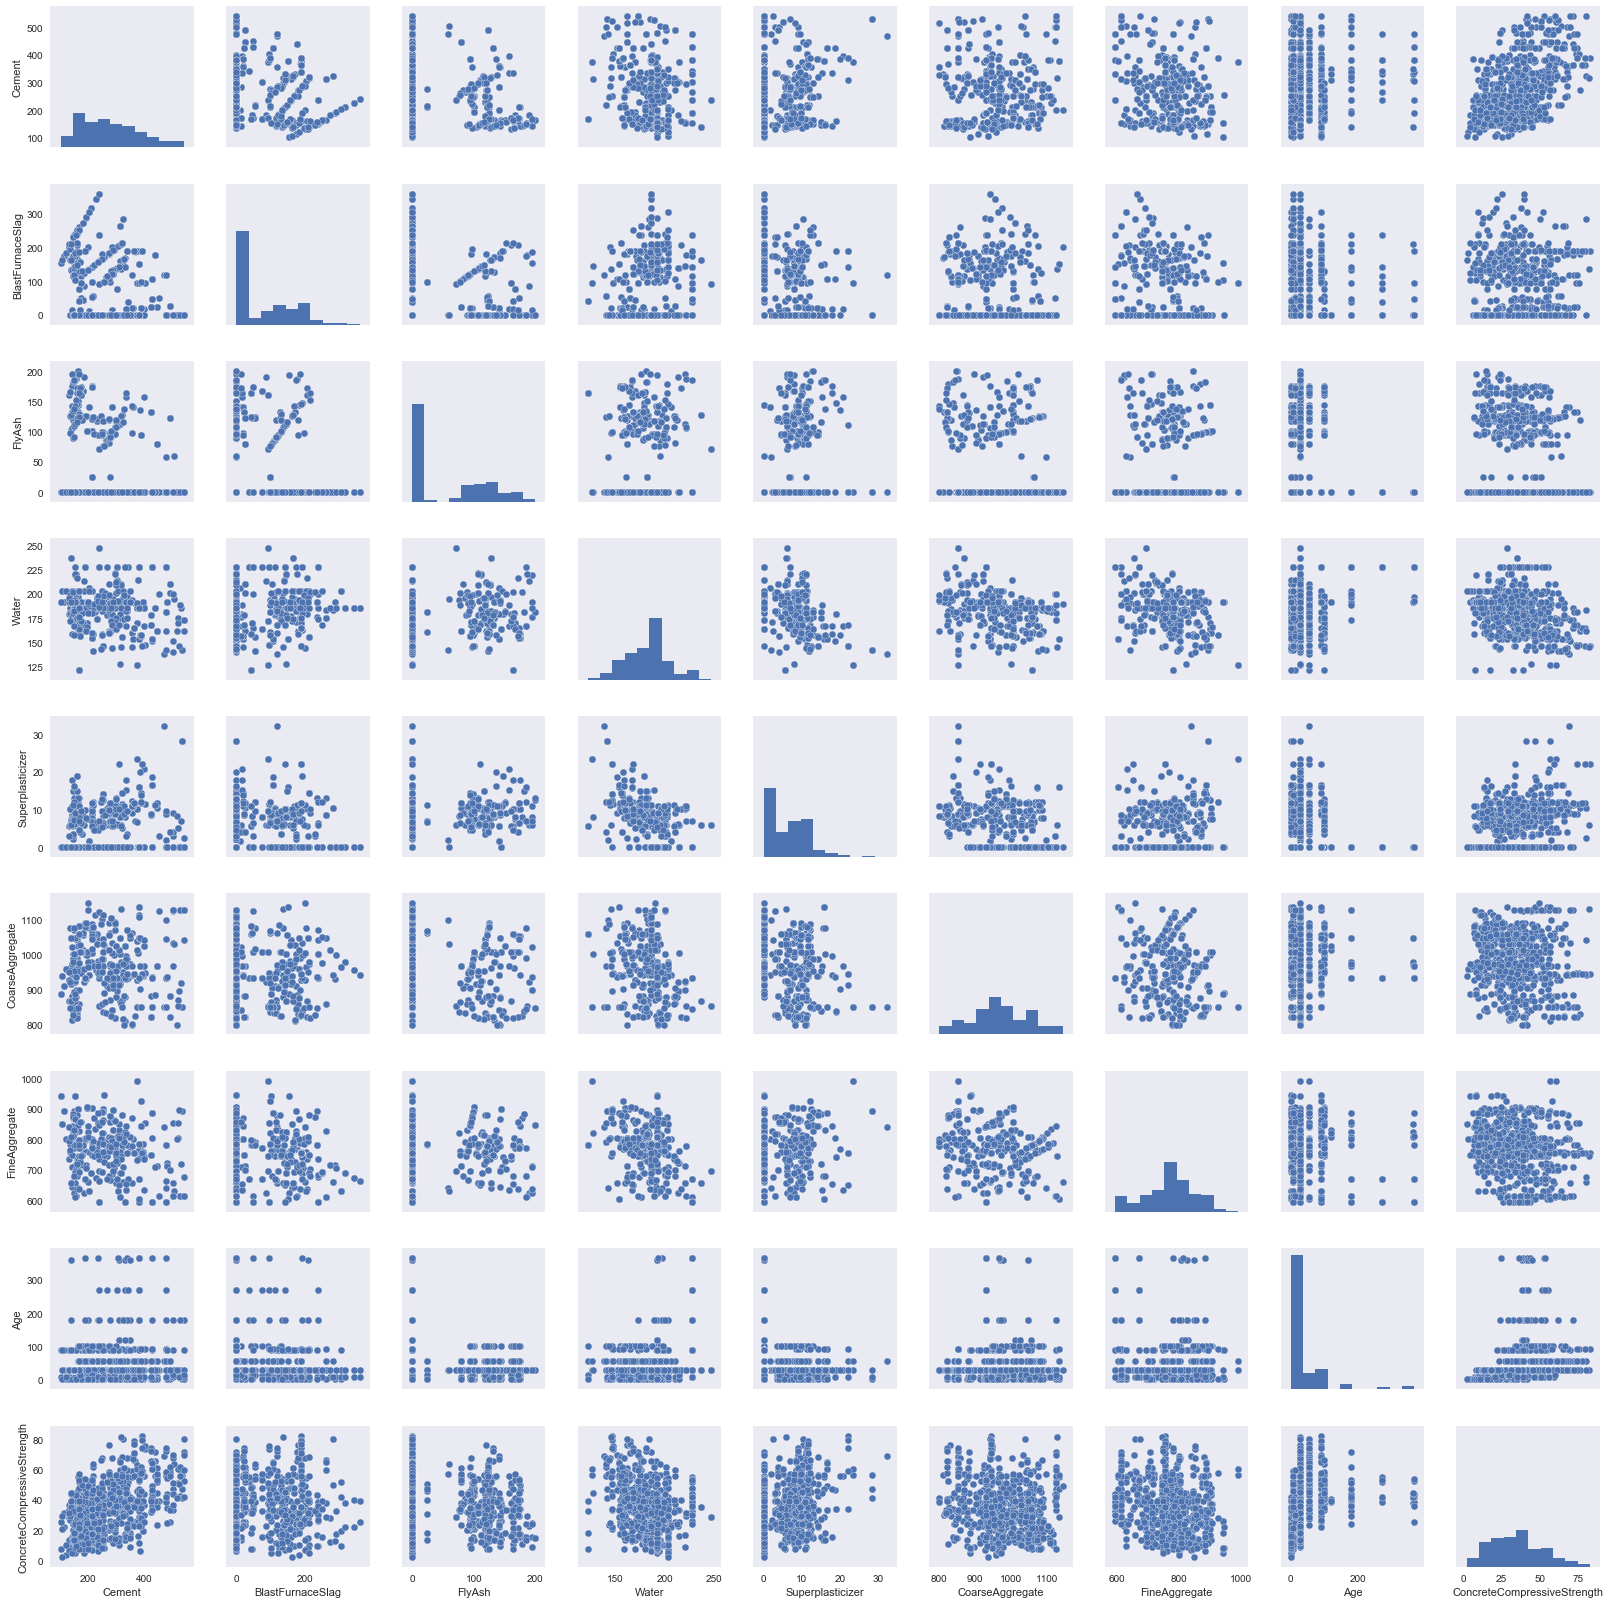

In [10]:
import seaborn as sns
sns.set_style("dark")
sns.pairplot(data)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The fo

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Applications/anaconda/lib/python3.6/sit

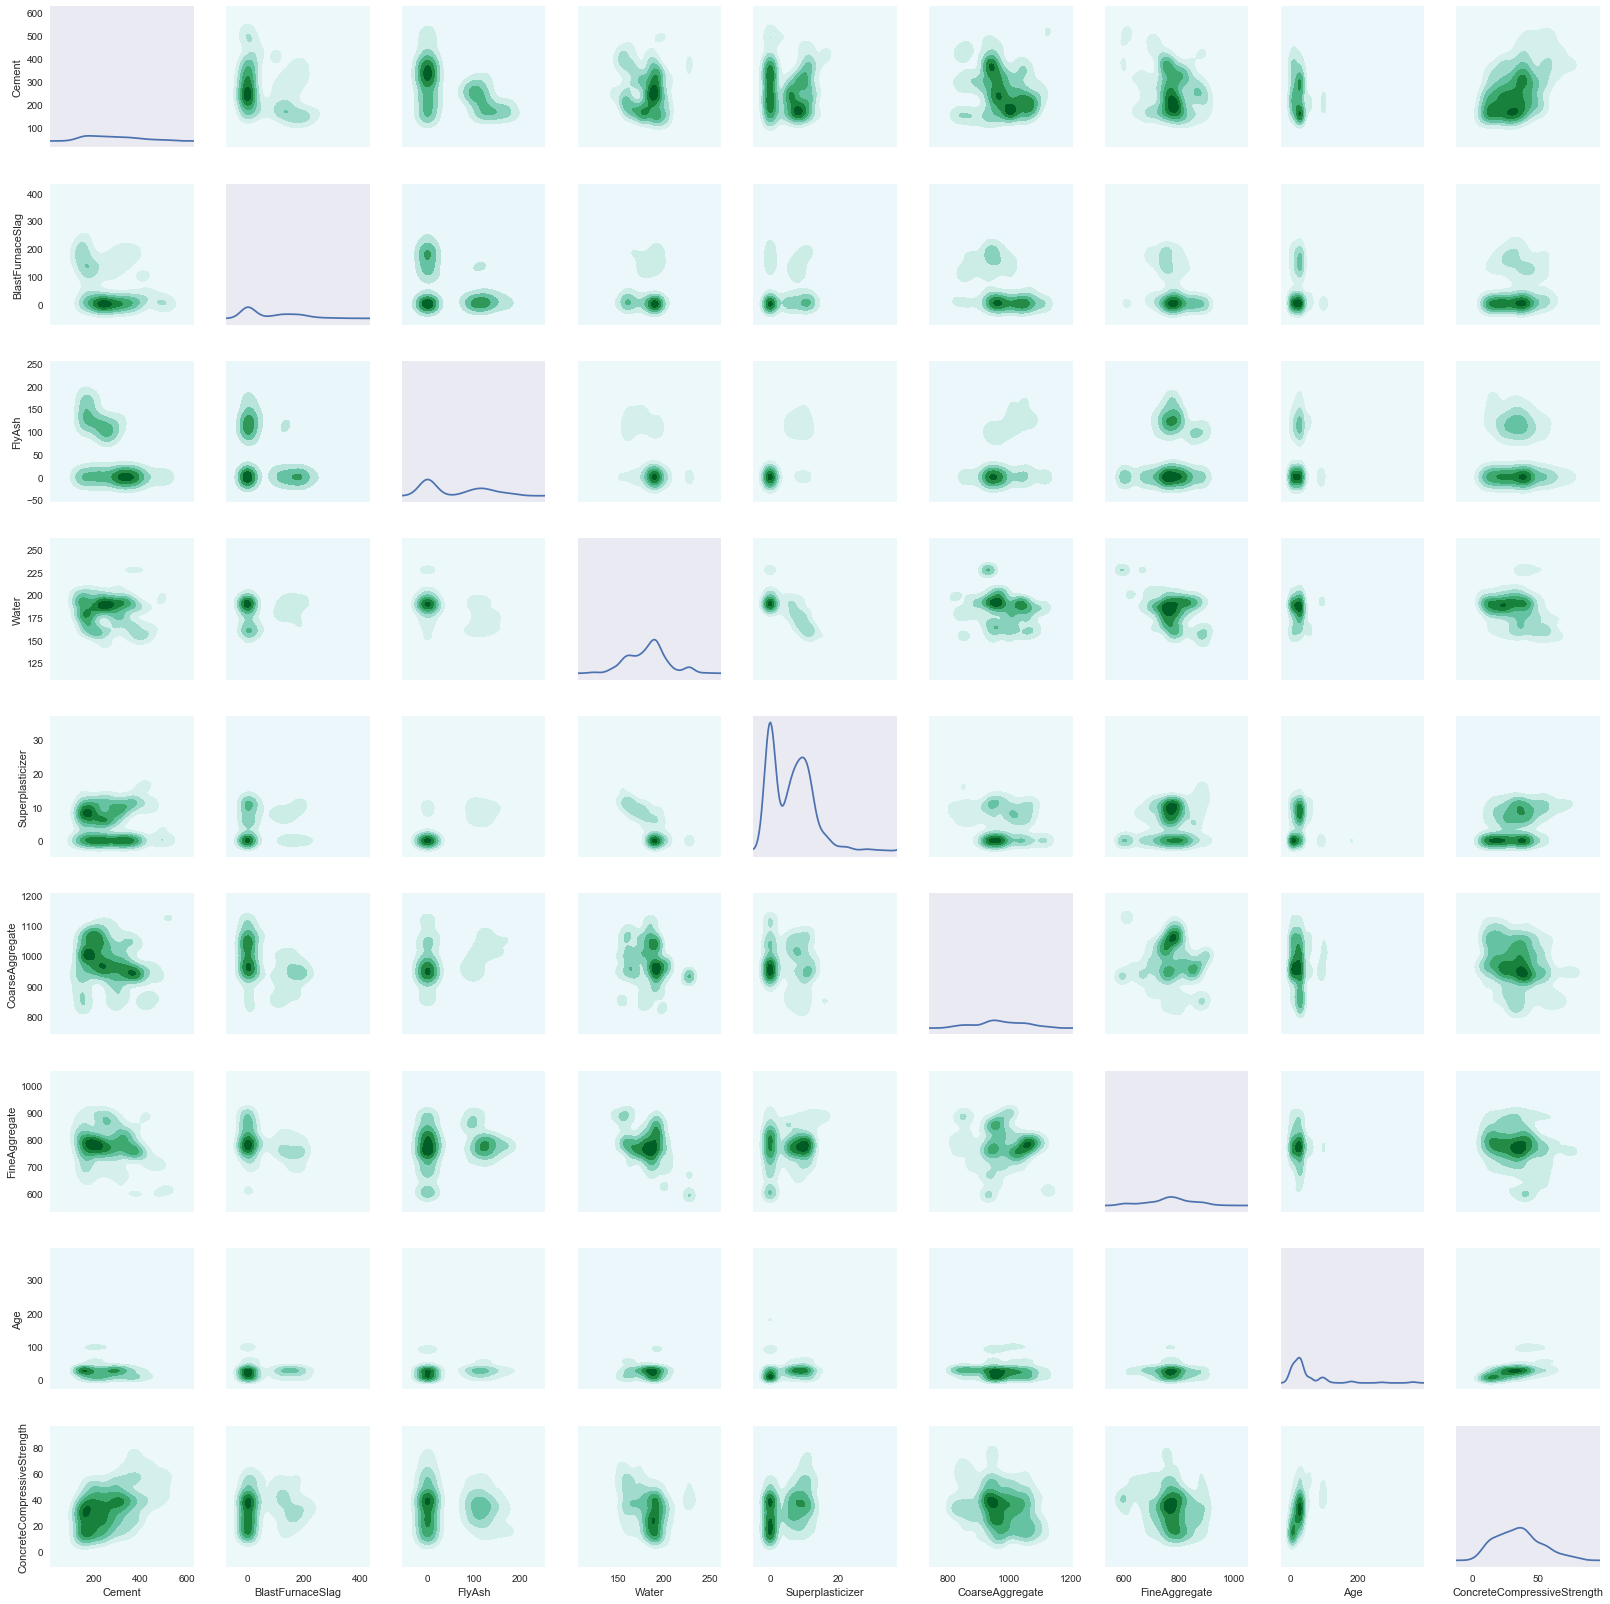

In [11]:
g = sns.PairGrid(data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6, shade=True)
plt.show()

<Figure size 432x432 with 0 Axes>

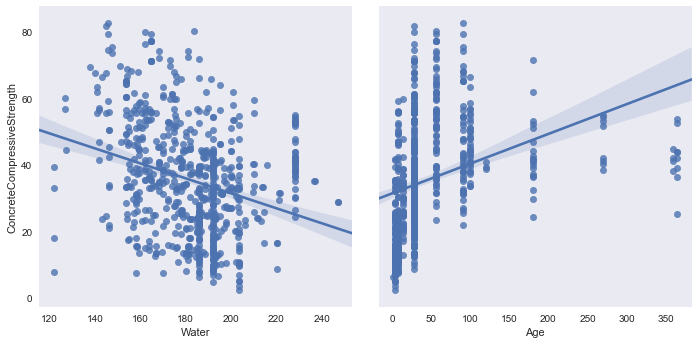

In [12]:
plt.figure(figsize=(6,6))
sns.pairplot(data, x_vars=["Water", "Age"], y_vars=["ConcreteCompressiveStrength"], 
              size=5,kind="reg");
plt.show()

In [ ]:
all_data = pd.concat([data, test])

### Preparing data for modelling

In [13]:
train = data.drop(['ConcreteCompressiveStrength'], axis = 1)
target = data.loc[:, ['ConcreteCompressiveStrength']]

# feature engineering
poly_features_2 = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
train_poly = poly_features_2.fit_transform(train)
test_poly = poly_features_2.fit_transform(test)

sc = StandardScaler()
train_std = sc.fit_transform(train_poly)
test_std = sc.transform(test_poly)

### Modelling 

In [14]:
def model_first(input_shape, n1=32, n2=64, n3=8, activation_1='elu', activation_2='relu'):
    """
    n1, n2, n3: number of nodes in each layer
    activation_1: for all layers except final layer
    activation_2: for last or final layer
    """
    input_shape_1 = Input(shape=(input_shape,))
    x = Dense(n1, activation=activation_1)(input_shape_1)
    x = Dense(n2, activation=activation_1)(x)
    x = Dense(n3, activation=activation_1)(x)
    output_shape = Dense(1, activation=activation_2)(x)
    return Model(inputs=input_shape_1, outputs=output_shape)

In [44]:
def model_second(input_shape, activation_1='elu', activation_2='relu'):
    input_shape_1 = Input(shape=(input_shape,))
    x = Dense(8, activation=activation_1)(input_shape_1)
    x = Dense(16, activation=activation_1)(x)
    x = Dense(32, activation=activation_1)(x)
    x = Dense(16, activation=activation_1)(x)
    x = Dense(8, activation=activation_1)(x)
    x = Dense(4, activation=activation_1)(x)
    output_shape = Dense(1, activation=activation_2)(x)
    return Model(inputs=input_shape_1, outputs=output_shape)

In [16]:
model = model_first(train_std.shape[1], n1=16, n2=32, n3=16, activation_1='elu', activation_2='relu')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 92)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1488      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 2,577
Trainable params: 2,577
Non-trainable params: 0
_________________________________________________________________


In [17]:
%%time
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(train_std, target, epochs=100, validation_split=0.1, 
                    callbacks=[early_stopping], verbose=2)

Train on 648 samples, validate on 73 samples
Epoch 1/100
 - 0s - loss: 34.4362 - acc: 0.0000e+00 - val_loss: 32.0626 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 32.1864 - acc: 0.0000e+00 - val_loss: 29.2067 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 28.4190 - acc: 0.0000e+00 - val_loss: 24.5263 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 22.6060 - acc: 0.0000e+00 - val_loss: 17.4785 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 16.1453 - acc: 0.0000e+00 - val_loss: 12.8441 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 11.8200 - acc: 0.0000e+00 - val_loss: 11.3426 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 10.9055 - acc: 0.0000e+00 - val_loss: 10.5378 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 10.1985 - acc: 0.0015 - val_loss: 9.8283 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 9.6984 - acc: 0.0000e+00 - val_loss: 9.3755 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 9.3551 - acc: 0.0000e+00 - val_loss: 8.8811 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s - lo

In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

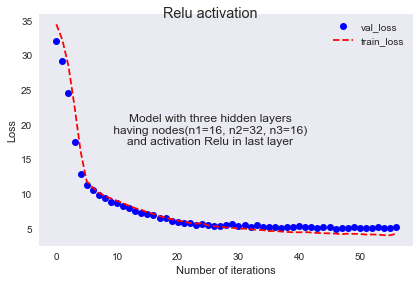

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))
line1, = ax.plot(range(len(history.history['val_loss'])), history.history['val_loss'], 'bo',label='val_loss')
line2, = ax.plot(range(len(history.history['loss'])), history.history['loss'],'r--', label='train_loss')

plt.xlabel('Number of iterations')
plt.ylabel('Loss')

# center text
txt = 'Model with three hidden layers\n having nodes(n1=16, n2=32, n3=16) \nand activation Relu in last layer'
fig.text(.5, .5, txt, ha='center')

plt.suptitle('Relu activation')
ax.legend()
plt.tight_layout()
plt.show()


#### Changing Number of nodes in hidden layers

In [38]:
model = model_first(train_std.shape[1], n1=8, n2=16, n3=8, activation_1='elu', activation_2='relu')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 92)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 744       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 1,033
Trainable params: 1,033
Non-trainable params: 0
_________________________________________________________________


In [39]:
%%time
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history1 = model.fit(train_std, target, epochs=100, validation_split=0.1, 
                    callbacks=[early_stopping], verbose=2)

Train on 648 samples, validate on 73 samples
Epoch 1/100
 - 0s - loss: 35.0664 - acc: 0.0000e+00 - val_loss: 33.2067 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 34.3876 - acc: 0.0000e+00 - val_loss: 32.3684 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 33.2965 - acc: 0.0000e+00 - val_loss: 30.9151 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 31.3112 - acc: 0.0000e+00 - val_loss: 27.9963 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 27.3799 - acc: 0.0000e+00 - val_loss: 22.5848 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 21.3453 - acc: 0.0000e+00 - val_loss: 16.4135 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 15.6316 - acc: 0.0000e+00 - val_loss: 12.5256 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 12.8874 - acc: 0.0015 - val_loss: 11.5510 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 11.6570 - acc: 0.0000e+00 - val_loss: 10.8911 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 10.6401 - acc: 0.0000e+00 - val_loss: 10.5063 - val_acc: 0.0000e+00
Epoch 11/100
 - 0s

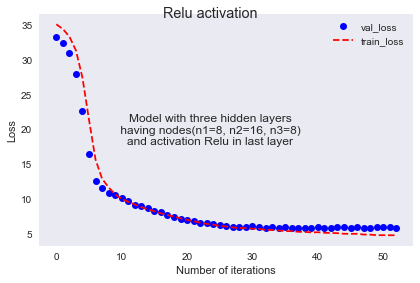

In [40]:
fig, ax = plt.subplots(figsize=(6, 4))

line1, = ax.plot(range(len(history1.history['val_loss'])), history1.history['val_loss'], 'bo',label='val_loss')
line2, = ax.plot(range(len(history1.history['loss'])), history1.history['loss'],'r--', label='train_loss')

plt.xlabel('Number of iterations')
plt.ylabel('Loss')

# center text
txt = 'Model with three hidden layers\n having nodes(n1=8, n2=16, n3=8) \nand activation Relu in last layer'
fig.text(.5, .5, txt, ha='center')

plt.suptitle('Relu activation')
ax.legend()
plt.tight_layout()
plt.show()


#### Changing activation function to Softmax in last layer

In [41]:
model = model_first(train_std.shape[1], n1=8, n2=16, n3=8, activation_1='elu', activation_2='softmax')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 92)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 744       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 1,033
Trainable params: 1,033
Non-trainable params: 0
_________________________________________________________________


In [42]:
%%time
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history2 = model.fit(train_std, target, epochs=100, validation_split=0.1, 
                    callbacks=[early_stopping], verbose=2)

Train on 648 samples, validate on 73 samples
Epoch 1/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 34.4781 - acc: 0.0000e+00 - val_loss: 32.9348 - val_acc: 0.0000e+00
Epoch 11/100
 

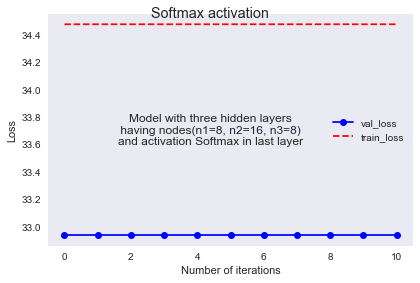

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))

line1, = ax.plot(range(len(history2.history['val_loss'])), history2.history['val_loss'], 'bo-',label='val_loss')
line2, = ax.plot(range(len(history2.history['loss'])), history2.history['loss'],'r--', label='train_loss')

plt.xlabel('Number of iterations')
plt.ylabel('Loss')

# center text
txt = 'Model with three hidden layers\n having nodes(n1=8, n2=16, n3=8) \nand activation Softmax in last layer'
fig.text(.5, .5, txt, ha='center')

plt.suptitle('Softmax activation')
ax.legend()
plt.tight_layout()
plt.show()


In [45]:
model = model_second(train_std.shape[1], activation_1='elu', activation_2='relu')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 92)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 744       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_27 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_28 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
__________

In [46]:
%%time
model.compile(optimizer='adamax',
              loss='mean_absolute_error',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history3 = model.fit(train_std, target, epochs=100, validation_split=0.1, 
                    callbacks=[early_stopping], verbose=1)

Train on 648 samples, validate on 73 samples
Epoch 1/100
648/648 [==============================] - 1s 1ms/step - loss: 34.6867 - acc: 0.0000e+00 - val_loss: 32.1476 - val_acc: 0.0000e+00
Epoch 2/100
648/648 [==============================] - 0s 82us/step - loss: 32.7091 - acc: 0.0000e+00 - val_loss: 29.0198 - val_acc: 0.0000e+00
Epoch 3/100
648/648 [==============================] - 0s 76us/step - loss: 28.8687 - acc: 0.0000e+00 - val_loss: 24.0358 - val_acc: 0.0000e+00
Epoch 4/100
648/648 [==============================] - 0s 83us/step - loss: 24.5466 - acc: 0.0000e+00 - val_loss: 21.4610 - val_acc: 0.0000e+00
Epoch 5/100
648/648 [==============================] - 0s 76us/step - loss: 22.8220 - acc: 0.0015 - val_loss: 20.0621 - val_acc: 0.0000e+00
Epoch 6/100
648/648 [==============================] - 0s 78us/step - loss: 21.5046 - acc: 0.0015 - val_loss: 19.0796 - val_acc: 0.0000e+00
Epoch 7/100
648/648 [==============================] - 0s 79us/step - loss: 20.2158 - acc: 0.0000e+0

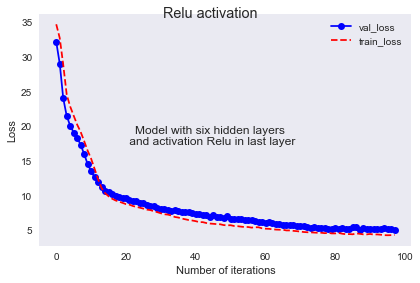

In [48]:
import numpy as np
import matplotlib.pyplot as plt

#plt.figure(figsize=(6, 6))


fig, ax = plt.subplots(figsize=(6, 4))

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(range(len(history3.history['val_loss'])), history3.history['val_loss'], 'bo-',label='val_loss')
#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(range(len(history3.history['loss'])), history3.history['loss'],'r--', label='train_loss')

plt.xlabel('Number of iterations')
plt.ylabel('Loss')
#plt.
# center text
txt = 'Model with six hidden layers\n and activation Relu in last layer'
fig.text(.5, .5, txt, ha='center')

plt.suptitle('Relu activation')
ax.legend()
# plt.xticks(range(0, len(history.history['val_loss']), 10))
plt.tight_layout()
plt.show()
# savefig('relu_activation.png')

#### Linear Regression

In [51]:
%%time
X_train, X_test, y_train, y_test = train_test_split(train_std, target, test_size=0.1, shuffle=True)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: user 12.1 ms, sys: 3.47 ms, total: 15.6 ms
Wall time: 12.4 ms


In [52]:
linear_reg.score(X_test, y_test)

0.7972389867686538

Note: The score in linear regression is based on multiclass loss.

### Conclusion
1. When we decreased the number of nodes in the hidden layers, it was observed that there was very slight increase in train and validation loss. So number of nodes can affect the results slightly in our observation.
2. When we changed the activation from Relu to Softmax in the last layer, it was quite evident that softmax activation did perform very poorly (train_loss=34.48) as compared to Relu activation (train_loss=4.77). This implies softmax is for classifcation problems and performs poorly in regression problems.
3. When we increased slightly the number of hidden layers, we could not find any significat increase or decrease in losses in our observations as obvious from figures.
4. The time taken by LinearRegression to to fit model was around 12.4ms while in deep learning models, each model took more than 1 seconds. So LinearRegression is computationally inexpensive.
5. Linear Regression performed (score around 9.03 on public leaderboard) worse than deep learning models (best was around 4.03) but there was one exception where we used softmax activation function. 
